<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/Clasificacion_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JFK Delay prediction

Importe librerias

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format


También cargaremos todas las funciones de preprocesamientoo de scikit-learn, contenidas en el **scikit preprocessing**.


In [2]:
from sklearn import preprocessing

Y aprovecharemos para comprobar la **versión instalada de scikit-learn**.

In [3]:
from sklearn import __version__ as sklearn_version
print('La versión instalada de scikit-learn es {}.'.format(sklearn_version))

La versión instalada de scikit-learn es 1.6.1.


Antes de empezar a repasar la Machine Learning Checklist, importatemos el DataSet de trabajo (**JFKFlights**). Este Dataset se encuentra publicado en la página oficial del Departamento de transporte de Estados Unidos , aunque para facilitar el trabajo lo hemos trasladado a un link de descarga en internet (repositorio público en GitHub).

In [4]:
url1 = 'https://bit.ly/3bf6QNP'
url2 = 'https://bit.ly/3kLR2p3'
url_weather = 'https://raw.githubusercontent.com/Sitg35/Binary-Classifier-JFK/refs/heads/main/NYC_Weather_2016_2022.csv'

In [5]:
df1= pd.read_csv(url1, index_col=0)
#lee la url el csv, con el df1= hacemos q se guarde

In [6]:
df2= pd.read_csv(url2, index_col=0)

In [7]:
df3= pd.read_csv(url_weather, index_col=0)

Unir dos csv, se tuvieron q partir por tamaño

In [8]:
df= pd.concat([df1, df2], ignore_index=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_AIRLINE_ID,"237,644.00","20,152.00",297.88,"19,690.00","19,790.00","20,363.00","20,409.00","21,171.00"
CRS_DEP_TIME,"250,152.00","1,334.61",529.10,3.00,915.00,"1,258.00","1,744.00","2,359.00"
TAXI_OUT,"232,641.00",18.19,9.61,1.00,12.00,16.00,21.00,166.00
CRS_ARR_TIME,"250,152.00","1,419.13",580.99,1.00,944.00,"1,455.00","1,914.00","2,400.00"
ARR_DEL15,"250,152.00",0.21,0.41,0.00,0.00,0.00,0.00,1.00
CRS_ELAPSED_TIME,"250,152.00",195.65,97.37,47.00,109.00,167.00,306.00,595.00
DISTANCE,"250,152.00","1,258.84",898.12,94.00,427.00,"1,028.00","2,248.00","4,983.00"


In [10]:
df.reset_index(drop = True, inplace = True)

In [11]:
df_weather = pd.read_csv(url_weather) #granularidad fecha y hora
print(df_weather)

                   time  temperature_2m (°C)  precipitation (mm)  rain (mm)  \
0      2016-01-01T00:00                 7.60                0.00       0.00   
1      2016-01-01T01:00                 7.50                0.00       0.00   
2      2016-01-01T02:00                 7.10                0.00       0.00   
3      2016-01-01T03:00                 6.60                0.00       0.00   
4      2016-01-01T04:00                 6.30                0.00       0.00   
...                 ...                  ...                 ...        ...   
59755  2022-10-25T19:00                  NaN                 NaN        NaN   
59756  2022-10-25T20:00                  NaN                 NaN        NaN   
59757  2022-10-25T21:00                  NaN                 NaN        NaN   
59758  2022-10-25T22:00                  NaN                 NaN        NaN   
59759  2022-10-25T23:00                  NaN                 NaN        NaN   

       cloudcover (%)  cloudcover_low (%)  cloudcov

In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59760 entries, 0 to 59759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   59760 non-null  object 
 1   temperature_2m (°C)    59592 non-null  float64
 2   precipitation (mm)     59592 non-null  float64
 3   rain (mm)              59592 non-null  float64
 4   cloudcover (%)         59592 non-null  float64
 5   cloudcover_low (%)     59592 non-null  float64
 6   cloudcover_mid (%)     59592 non-null  float64
 7   cloudcover_high (%)    59592 non-null  float64
 8   windspeed_10m (km/h)   59592 non-null  float64
 9   winddirection_10m (°)  59587 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.6+ MB


Transforma el índice actual de df_weather (que contiene la fecha y hora) en una columna llamada 'time'.
Esto crea un nuevo índice numérico por defecto

 Convierte los valores de la columna 'time' a tipo datetime, permitiendo operaciones de series temporales.
 NOTA: Para que la conversión se guarde en el DataFrame, debes asignar el resultado a df_weather['time'].

In [13]:
df_weather['time'] = pd.to_datetime(df_weather['time'])

DATA JOIN

In [14]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
#LA PONEMOS COMO FECHA

jOIN SOO POR FECHA, HAY Q CAMBAR LA GRANULARIDAD DE DF.WEATHER A DIA

In [15]:
df_weather.set_index('time', inplace = True)

In [16]:
df_weather = df_weather.resample('D').mean() #TE PONE EL MINIMO DE CADA SEMANA

Hay muxas fechas u no las necesito todas por lo q vamos hacer mas limpieza

In [17]:
#Recoger la parete del data en q  la fecha sea menor o igual a la fecha max q hay en el df
df_weather = df_weather[(df_weather.index <= max(df['FL_DATE'])) & (df_weather.index >= min(df['FL_DATE']))].copy()


In [18]:
df_weather.columns = ['temperature_2m', 'precipitation', 'rain',
       'cloudcover', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'winddirection_10m']
       #renombramos las columnas. Si es exacatamente el nº de columnas q hay lo va a sobreescribir, hay otras formas de hacerlo

In [19]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Freq: D
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature_2m     730 non-null    float64
 1   precipitation      730 non-null    float64
 2   rain               730 non-null    float64
 3   cloudcover         730 non-null    float64
 4   cloudcover_low     730 non-null    float64
 5   cloudcover_mid     730 non-null    float64
 6   cloudcover_high    730 non-null    float64
 7   windspeed_10m      730 non-null    float64
 8   winddirection_10m  730 non-null    float64
dtypes: float64(9)
memory usage: 57.0 KB


In [20]:
df_weather['FL_DATE'] = df_weather.index

In [21]:
df = df.join(df_weather, on = 'FL_DATE', how='left', rsuffix='_w')#TODAS LAS COLUMN Q VIENE DE LE METEMOS UN _W

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                250152 non-null  datetime64[ns]
 1   OP_CARRIER_AIRLINE_ID  237644 non-null  float64       
 2   TAIL_NUM               235143 non-null  object        
 3   ORIGIN                 250152 non-null  object        
 4   ORIGIN_CITY_NAME       250152 non-null  object        
 5   ORIGIN_STATE_NM        250152 non-null  object        
 6   DEST                   250152 non-null  object        
 7   DEST_CITY_NAME         250152 non-null  object        
 8   DEST_STATE_NM          250152 non-null  object        
 9   CRS_DEP_TIME           250152 non-null  int64         
 10  TAXI_OUT               232641 non-null  float64       
 11  CRS_ARR_TIME           250152 non-null  int64         
 12  ARR_DEL15              250152 non-null  floa

In [23]:
#borramos la columna de fl_date_w
df.drop('FL_DATE_w', axis = 1, inplace = True)

Data Understanding

#### 1. Tamaño del dataset

In [24]:
df.info(verbose=False)
#250152 entries no debe cambiar nunca

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 24 entries, FL_DATE to winddirection_10m
dtypes: datetime64[ns](1), float64(14), int64(2), object(7)
memory usage: 45.8+ MB


# Ver datos

In [25]:
df.head(4).T

,0,1,2,3
FL_DATE,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00,2018-02-01 00:00:00
OP_CARRIER_AIRLINE_ID,"20,363.00","20,363.00","20,363.00","20,363.00"
TAIL_NUM,N299PQ,N920XJ,N605LR,N800AY
ORIGIN,BNA,RDU,BUF,ORF
ORIGIN_CITY_NAME,"Nashville, TN","Raleigh/Durham, NC","Buffalo, NY","Norfolk, VA"
ORIGIN_STATE_NM,Tennessee,North Carolina,New York,Virginia
DEST,JFK,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York,New York
CRS_DEP_TIME,1359,1354,1529,1704


A continuación se incluye la descripción de las variables:

* **FL_DATE**: Date of the observation
* **OP_CARRIER_AIRLINE_ID**: Identificador de la compañía aérea que opera el vuelo
* **TAIL_NUM**: Número de cola del avión, identificador único del avión
* **ORIGIN**: aeropuerto de origen
* **ORIGIN_CITY_NAME**: ciudad de origen
* **ORIGIN_STATE_NM**: estado (USA) de origen
* **DEST**: aeropuerto de destino, en este caso será siempre el JFK
* **DEST_CITY_NAME**: ciudad de destino, en este caso será siempre Nueva York
* **DEST_STATE_NM**: estado (USA) de destino, en este caso será siempre Nueva York
* **CRS_DEP_TIME**: hora prevista de salida
* **TAXI_OUT**: tiempo transcurrido entre la salida de la terminal y el despegue efectivo del avión
* **CRS_ARR_TIME**: hora prevista de llegada
* **ARR_DEL15**: booleana (1/0) indicando si el vuelo ha llegado con más de 15 minutos de retraso.
* **CRS_ELAPSED_TIME**: tiempo previsto de vuelo.
* **DISTANCE**: distancia entre aeropuertos

Deberemos elegir entre la variable **ARR_DELAY y ARR_DEL15** como predictivos, en este caso, como se trata de un modelo de clasificación, tomaremos como target la variable **ARR_DEL15**


In [26]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 24 entries, FL_DATE to winddirection_10m
dtypes: datetime64[ns](1), float64(14), int64(2), object(7)
memory usage: 45.8+ MB


In [27]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                250152 non-null  datetime64[ns]
 1   OP_CARRIER_AIRLINE_ID  237644 non-null  float64       
 2   TAIL_NUM               235143 non-null  object        
 3   ORIGIN                 250152 non-null  object        
 4   ORIGIN_CITY_NAME       250152 non-null  object        
 5   ORIGIN_STATE_NM        250152 non-null  object        
 6   DEST                   250152 non-null  object        
 7   DEST_CITY_NAME         250152 non-null  object        
 8   DEST_STATE_NM          250152 non-null  object        
 9   CRS_DEP_TIME           250152 non-null  int64         
 10  TAXI_OUT               232641 non-null  float64       
 11  CRS_ARR_TIME           250152 non-null  int64         
 12  ARR_DEL15              250152 non-null  floa

In [28]:
df.describe(include=['object']).T

,count,unique,top,freq
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


In [29]:
df.describe(exclude=['object']).T

,count,mean,min,25%,50%,75%,max,std
FL_DATE,250152,2019-01-01 08:55:24.724167424,2018-01-01 00:00:00,2018-07-06 00:00:00,2018-12-30 00:00:00,2019-06-30 00:00:00,2019-12-31 00:00:00,NaN
OP_CARRIER_AIRLINE_ID,"237,644.00","20,152.00","19,690.00","19,790.00","20,363.00","20,409.00","21,171.00",297.88
CRS_DEP_TIME,"250,152.00","1,334.61",3.00,915.00,"1,258.00","1,744.00","2,359.00",529.10
TAXI_OUT,"232,641.00",18.19,1.00,12.00,16.00,21.00,166.00,9.61
CRS_ARR_TIME,"250,152.00","1,419.13",1.00,944.00,"1,455.00","1,914.00","2,400.00",580.99
ARR_DEL15,"250,152.00",0.21,0.00,0.00,0.00,0.00,1.00,0.41
CRS_ELAPSED_TIME,"250,152.00",195.65,47.00,109.00,167.00,306.00,595.00,97.37
DISTANCE,"250,152.00","1,258.84",94.00,427.00,"1,028.00","2,248.00","4,983.00",898.12
temperature_2m,"250,152.00",13.00,-13.85,4.48,13.45,22.01,31.32,9.72
precipitation,"250,152.00",0.15,0.00,0.00,0.00,0.15,2.39,0.29


In [30]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


In [31]:
#nulos, SE debe usar del tipo num no objet
df.select_dtypes(include=['number']).isnull().sum()

,0
OP_CARRIER_AIRLINE_ID,12508
CRS_DEP_TIME,0
TAXI_OUT,17511
CRS_ARR_TIME,0
ARR_DEL15,0
CRS_ELAPSED_TIME,0
DISTANCE,0
temperature_2m,0
precipitation,0
rain,0


**Distribucion del Traget**

Saber los vueles q se retrasan
Si hay null target borrar

In [32]:
df['ARR_DEL15'].mean() #TARGET

0.21040007675333397

In [33]:
# 21.04 vuelos q se retrasan
#vigilad si el % es muy bajo o alto porq se complica la modelización

In [34]:
df['ARR_DEL15'].value_counts()

,count
ARR_DEL15,
0.00,197520
1.00,52632


EDAD

In [35]:
#Fechas
#LAX_df_dia = LAX_df[['FL_DATE','ARR_DEL15']].groupby(['FL_DATE']).mean()
# Filtrar el DataFrame df para obtener solo los vuelos que salen de LAX
LAX_df = df[df['ORIGIN'] == 'LAX'].copy() # Importante el .copy() para evitar SettingWithCopyWarning

# Ahora puedes agrupar y calcular la media de los retrasos por día
LAX_df_dia = LAX_df[['FL_DATE', 'ARR_DEL15']].groupby(['FL_DATE']).mean()

# Mostrar los primeros resultados
LAX_df_dia.head()

,ARR_DEL15
FL_DATE,
2018-01-01,0.32
2018-01-02,0.37
2018-01-03,0.11
2018-01-04,0.50
2018-01-05,0.72


In [36]:
#Si hay dias donde no tengo casi retrasos otros dias muxos
LAX_df_dia.head(10)

,ARR_DEL15
FL_DATE,
2018-01-01,0.32
2018-01-02,0.37
2018-01-03,0.11
2018-01-04,0.50
2018-01-05,0.72
2018-01-06,0.64
2018-01-07,0.69
2018-01-08,0.49
2018-01-09,0.14


<Axes: xlabel='FL_DATE'>

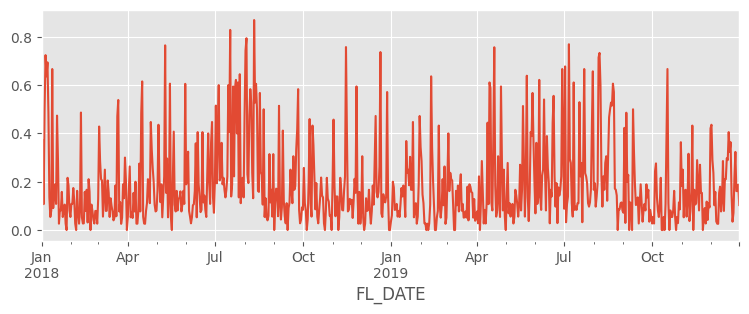

In [37]:
plt.figure(figsize=[9,3])
LAX_df_dia['ARR_DEL15'].plot()

Extraemos la media semanal de retrasos en los vuelos, esto nos permitirá ver de forma más nitida si la serie tiene cierta estacionalidad


<Axes: xlabel='FL_DATE'>

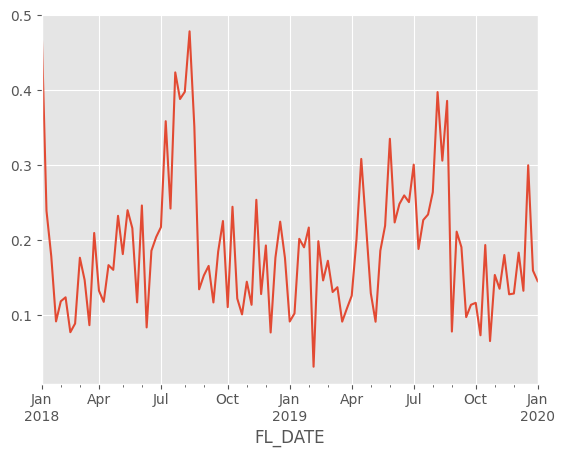

In [38]:
media_retrasos_semanal = LAX_df_dia['ARR_DEL15'].resample('W').mean()
media_retrasos_semanal.plot()

Estacionar y dias concretos con mas retraso

In [39]:
print(df.columns)

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'TAXI_OUT', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'DISTANCE', 'temperature_2m',
       'precipitation', 'rain', 'cloudcover', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m'],
      dtype='object')


<Axes: xlabel='ARR_DEL15', ylabel='precipitation'>

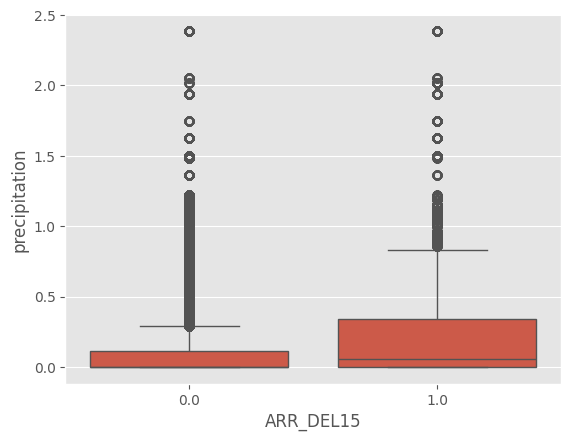

In [40]:
sns.boxplot(data=df, x='ARR_DEL15', y='precipitation')
#Mediana
#Quartiles
#Outliers

# Categoricas

In [41]:
#Etiquetas son mas importantes
#Distribucion: núlos TAIL_NUM, tranfo a numerica
df.pivot_table(index='ORIGIN_STATE_NM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=('mean', 'ARR_DEL15'), ascending=True).head()

<ipython-input-41-3d21b79fca2e>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(index='ORIGIN_STATE_NM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=('mean', 'ARR_DEL15'), ascending=True).head()
<ipython-input-41-3d21b79fca2e>:3: FutureWarning: The provided callable <function mean at 0x7ae251b2e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index='ORIGIN_STATE_NM', values='ARR_DEL15', aggfunc=[len, sum, np.mean]).sort_values(by=('mean', 'ARR_DEL15'), ascending=True).head()


,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN_STATE_NM,,,
U.S. Virgin Islands,478,65.00,0.14
Oregon,2528,405.00,0.16
Minnesota,2806,471.00,0.17
Nevada,7902,"1,360.00",0.17
Indiana,2086,370.00,0.18


In [42]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


In [43]:
#Imputacion de nulos

In [44]:
#Valos extremos
df['TAIL_NUM'].value_counts()#matricula de la aerolinea

,count
TAIL_NUM,
N110AN,761
N113AN,751
N111ZM,748
N115NN,740
N109NN,740
...,...
N197UW,1
N986AN,1
N315RJ,1


En este caso, podríamos rellenarlo con el valor más común, o el valor más probable por Aerolinea. Sin embargo, la presencia de nulls puede contener información relevante para el modelo. Por tanto, es conveniente rellenar los nulos con un valor diferente al resto.

In [45]:
df['TAIL_NUM'].fillna(value='ZZZ', inplace=True)

<ipython-input-45-93ddce1ea743>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TAIL_NUM'].fillna(value='ZZZ', inplace=True)


In [46]:
#Eliminar variable con poca varancia, no aportan nada
nom_variance_atribuetes= ['DEST','DEST_CITY_NAME','DEST_STATE_NM']

In [47]:
df.drop(nom_variance_atribuetes, axis=1, inplace=True)

# Variedaddes de fecha

In [48]:
df['FL_DATE']
#LO LEE COMO DATE TIME POR ESO SE PUEDE EXTRAER DIRECTAMENTE. SI NO FUERA ASI, HABRIA Q TRANSFORMARLO

,FL_DATE
0,2018-02-01
1,2018-02-01
2,2018-02-01
3,2018-02-01
4,2018-02-01
...,...
250147,2018-10-31
250148,2018-10-31
250149,2018-10-31
250150,2018-10-31


In [49]:
df['Year'] = df['FL_DATE'].dt.year
df['Day'] = df['FL_DATE'].dt.day  #  column name to 'Day'
df['Month'] = df['FL_DATE'].dt.month #  column name to 'Month'
df['Quarter'] = df['FL_DATE'].dt.quarter #  column name to 'Quarter'
df['Weekday'] = df['FL_DATE'].dt.weekday #  column name to 'Weekday'

In [50]:
#eliminamos la variable inicial par no tener errores
df.drop('FL_DATE', axis=1, inplace=True)

In [51]:
df['Weekday'].value_counts()
#0 es lunes, 6 es domingo

,count
Weekday,
0,37183
4,36848
3,36679
6,36288
1,35945
2,35443
5,31766


# Tratamiento variables categoricas

In [52]:
df.select_dtypes(include=['object']).describe().T
#select_dtypes solo las columnas del DataFrame (df) que tienen el tipo de datos object

,count,unique,top,freq
TAIL_NUM,250152,2646,ZZZ,15009
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137


In [53]:
# tail number ohe seria muy grande, tendria column con muy poca variancia
df['TAIL_NUM'].value_counts(dropna=False)

,count
TAIL_NUM,
ZZZ,15009
N110AN,761
N113AN,751
N111ZM,748
N115NN,740
...,...
N197UW,1
N986AN,1
N315RJ,1


In [54]:

# Frecuencia encoding
df_tall_num = df['TAIL_NUM'].value_counts(dropna=False)

print(df_tall_num)  # Imprime el resultado



TAIL_NUM
ZZZ       15009
N110AN      761
N113AN      751
N111ZM      748
N115NN      740
          ...  
N197UW        1
N986AN        1
N315RJ        1
N801AW        1
N945DN        1
Name: count, Length: 2646, dtype: int64


In [55]:
df_tall_num.columns =['TAIL_NUM_COUNT']

In [56]:
df_tall_num['TAIL_NUM_COUNT']=df_tall_num.index
df_tall_num.reset_index(drop = True, inplace = True)
df_tall_num


,count
0,15009
1,761
2,751
3,748
4,740
...,...
2642,1
2643,1
2644,1
2645,1


In [57]:
df_tall_num = df['TAIL_NUM'].value_counts(dropna=False).reset_index()
df_tall_num.columns = ['TAIL_NUM', 'TAIL_NUM_COUNT'] # Importante renombrar las columnas

df = df.merge(df_tall_num, on='TAIL_NUM', how="left")

print(df[['TAIL_NUM', 'TAIL_NUM_COUNT']].head()) # Ver los resultados

  TAIL_NUM  TAIL_NUM_COUNT
0   N299PQ             340
1   N920XJ             337
2   N605LR             310
3   N800AY             265
4   N600LR             339


In [58]:
df.drop('TAIL_NUM', axis=1, inplace=True)

#ORIGIN limpiar
2.42
[DSC1124ESP] - 13/02/2025 - M4 - Aprendizaje Supervisado: Regresión (3)

In [61]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137


OHE ORIGIN
técnica utilizada para convertir datos categóricos en un formato binario, donde cada categoría se representa como un vector de ceros y unos

In [63]:
dami_dataset=pd.get_dummies(df['ORIGIN'], prefix='ORIGIN', drop_first=True)
#metemos el prefijo para diferetenciar

In [65]:
#unimos el data sert anterior creado con true o false con el antiguo
df=pd.concat([df, dami_dataset], axis=1)

In [66]:
df.drop('ORIGIN', axis=1, inplace=True)

hacemos lo mismo q la anterior para cada una de las anteriores

OHE ORIGIN_CITY_NAME

In [67]:
dami_dataset=pd.get_dummies(df['ORIGIN_CITY_NAME'], prefix='ORIGIN_CITY_NAME', drop_first=True)
#metemos el prefijo para diferetenciar

In [68]:
#unimos el data sert anterior creado con true o false con el antiguo
df=pd.concat([df, dami_dataset], axis=1)

In [69]:
df.drop('ORIGIN_CITY_NAME', axis=1, inplace=True)

OHE ORIGIN_STATE_NM

In [70]:
dami_dataset=pd.get_dummies(df['ORIGIN_STATE_NM'], prefix='ORIGIN_STATE_NM', drop_first=True)
#metemos el prefijo para diferetenciar

In [71]:
#unimos el data sert anterior creado con true o false con el antiguo
df=pd.concat([df, dami_dataset], axis=1)

In [72]:
df.drop('ORIGIN_STATE_NM', axis=1, inplace=True)

# Check final

In [75]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 193 entries, OP_CARRIER_AIRLINE_ID to ORIGIN_STATE_NM_Wyoming
dtypes: bool(171), float64(14), int32(5), int64(3)
memory usage: 78.0 MB


## MODELING

Division train test validacion

Division development y validacion

In [76]:
from sklearn import model_selection
from sklearn import metrics

In [80]:
df.pivot_table(index=['Year','Month'], values='ARR_DEL15', aggfunc=[len, sum, np.mean])

<ipython-input-80-6436b5a7e358>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(index=['Year','Month'], values='ARR_DEL15', aggfunc=[len, sum, np.mean])
<ipython-input-80-6436b5a7e358>:1: FutureWarning: The provided callable <function mean at 0x7ae251b2e160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Year','Month'], values='ARR_DEL15', aggfunc=[len, sum, np.mean])


len       sum      mean
           ARR_DEL15 ARR_DEL15 ARR_DEL15
Year Month                              
2018 1          9244  1,968.00      0.21
     2          9115  1,418.00      0.16
     3          9927  1,825.00      0.18
     4         10393  2,184.00      0.21
     5         10915  2,478.00      0.23
     6         11052  2,504.00      0.23
     7         11201  3,463.00      0.31
     8         11202  3,345.00      0.30
     9         10591  2,304.00      0.22
     10        10952  1,628.00      0.15
     11        10194  2,138.00      0.21
     12        10697  2,199.00      0.21
2019 1         10245  2,154.00      0.21
     2          9381  1,817.00      0.19
     3         11084  1,812.00      0.16
     4         10308  2,236.00      0.22
     5         10797  2,122.00      0.20
     6         10543  2,743.00      0.26
     7         10661  2,735.00      0.26
     8         10782  2,912.00      0.27
     9         10120  1,544.00      0.15
     10        10426  1,418.00      0.14
     11         9937  1,205.00      0.12
     12        10385  2,480.00      0.24

In [86]:
df.shape

(250152, 193)

Junio Julio tienen media del target mas alta. Febrero Marzo octubre son mas tranquilos

Modelo q funcione a lo largo del año

Es una partición de los datos, específicamente el conjunto de validación. Selecciona las filas del DataFrame df donde el año es 2019 y el mes es julio o posterior. No es el target en sí, sino una porción del DataFrame usada para evaluar el modelo durante el entrenamiento y ajustar hiperparámetros.

In [81]:
val_df = df[(df['Year'] == 2019)& (df['Month']>=7)]

In [82]:
val_df.shape

(62311, 193)

In [87]:
dev_df = df[(df['Year'] == 2018)& (df['Month']<7)]

In [89]:
dev_df.shape

(60646, 193)

In [ ]:
#Necesitamos dividir target y atributos


In [91]:
dev_df_X = dev_df.drop('ARR_DEL15', axis=1)
dev_df_y = dev_df[['ARR_DEL15']]

In [92]:
val_df_X = val_df.drop('ARR_DEL15', axis=1)
val_df_y = val_df[['ARR_DEL15']]

In [93]:
dev_df_X.head().T

,0,1,2,3,4
OP_CARRIER_AIRLINE_ID,"20,363.00","20,363.00","20,363.00","20,363.00","20,363.00"
CRS_DEP_TIME,1359,1354,1529,1704,1325
TAXI_OUT,27.00,37.00,21.00,36.00,20.00
CRS_ARR_TIME,1719,1541,1709,1845,1454
CRS_ELAPSED_TIME,140.00,107.00,100.00,101.00,89.00
DISTANCE,765.00,427.00,301.00,290.00,187.00
temperature_2m,1.12,1.12,1.12,1.12,1.12
precipitation,0.00,0.00,0.00,0.00,0.00
rain,0.00,0.00,0.00,0.00,0.00
cloudcover,69.58,69.58,69.58,69.58,69.58


In [94]:
dev_df_y.head().T

,0,1,2,3,4
ARR_DEL15,0.00,0.00,0.00,0.00,0.00


In [96]:
val_df_y.head().T

,92364,92365,92366,92367,92368
ARR_DEL15,1.00,0.00,0.00,0.00,0.00


#### Random Holdout

In [102]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio
                                        random_state = 42
                                     )

Model Selection


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
#Instanciar el algoritmo, decidir los paramatreso
#Entrenar el modelo fit
#Evaluas

In [98]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

In [105]:
#Entrenar
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
#evaluar

In [106]:
export_graphviz(dt, out_file='tree.dot', feature_names=X_train.columns, filled=True, rounded=True)